In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import pickle

In [2]:
TEST_IMAGE_DIR = "D:\\DEEP LEARNING\\massh\\png\\test"
TEST_MASK_DIR = "D:\\DEEP LEARNING\\massh\\png\\test_labels"

In [3]:
test_images = []
test_masks = []

In [4]:
test_image_filenames = sorted(os.listdir(TEST_IMAGE_DIR))
test_mask_filenames = sorted(os.listdir(TEST_MASK_DIR))

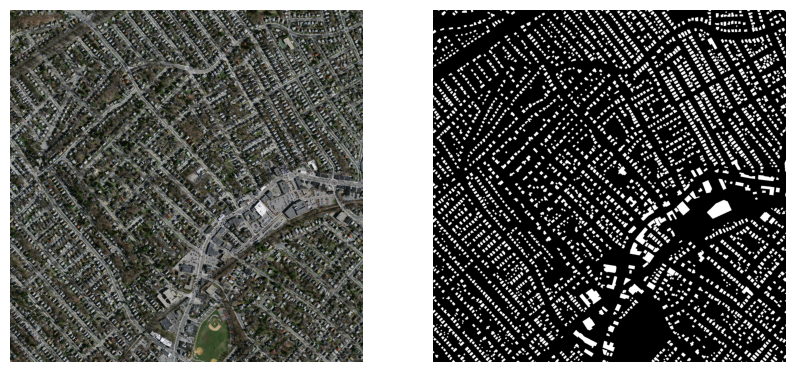

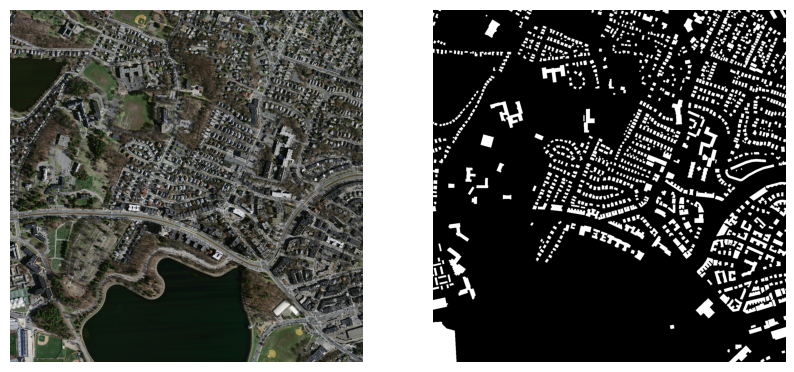

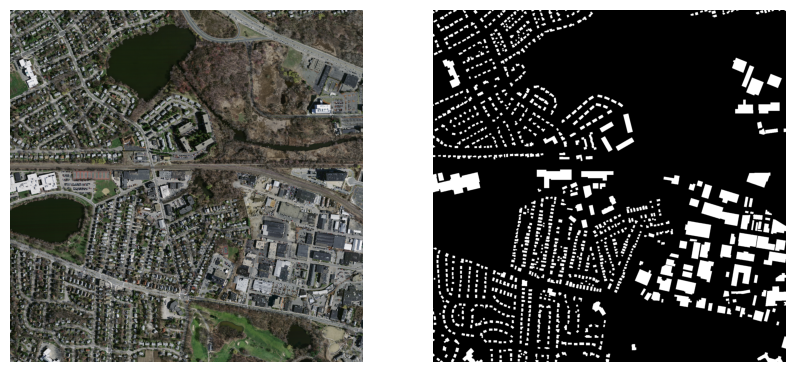

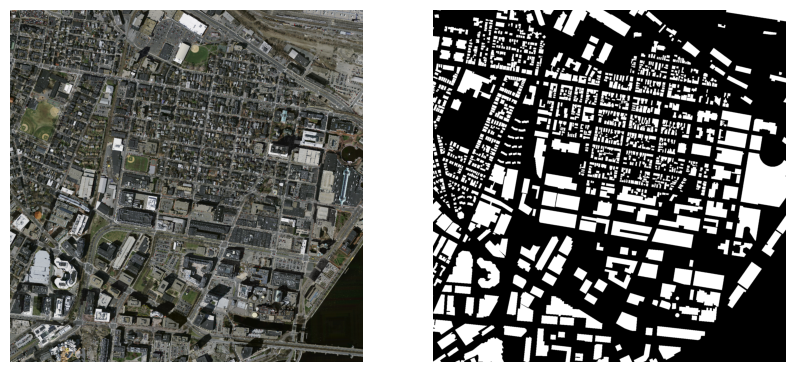

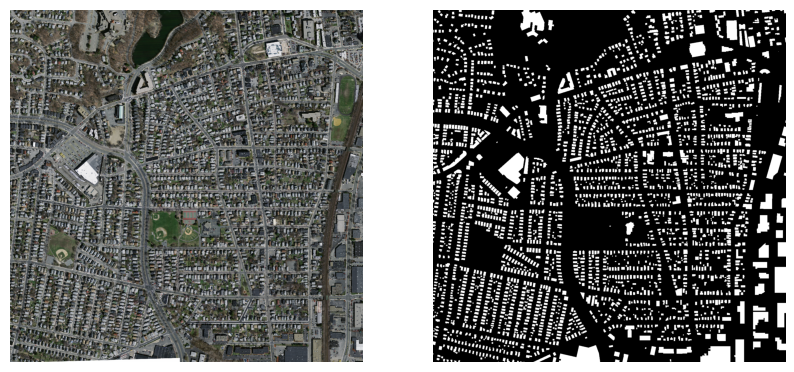

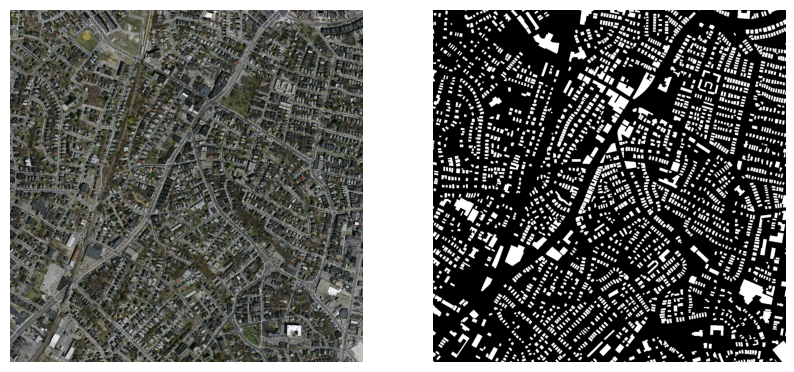

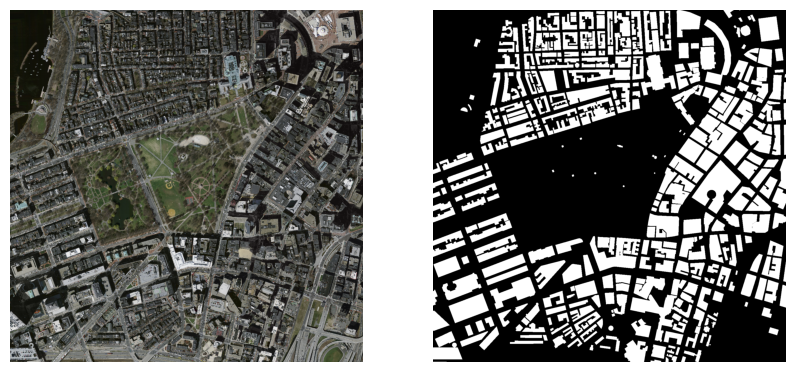

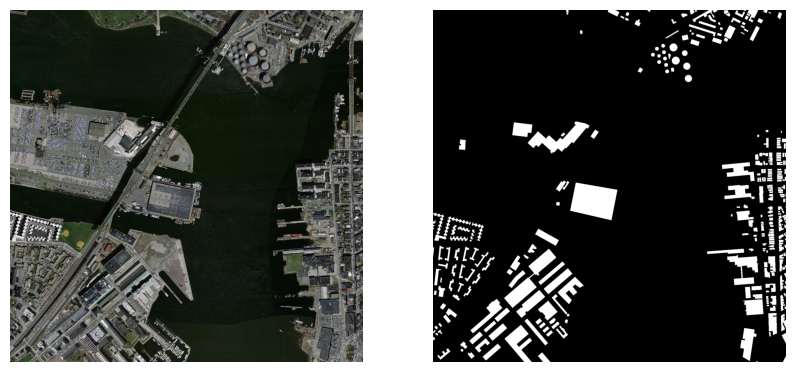

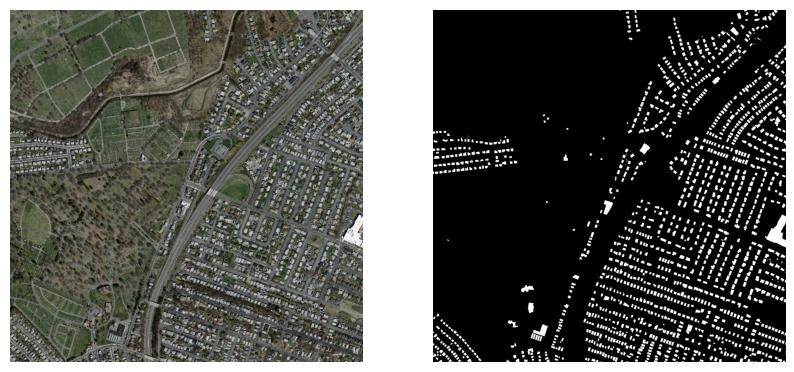

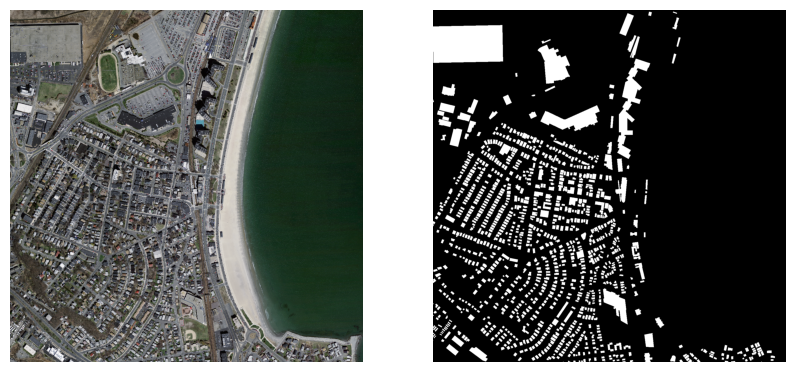

In [5]:

num_samples_to_display = 5  

for i, (img_file, mask_file) in enumerate(zip(test_image_filenames, test_mask_filenames)):
  
    try:
     
        img_path = os.path.join(TEST_IMAGE_DIR, img_file)
        mask_path = os.path.join(TEST_MASK_DIR, mask_file)

        img = load_img(img_path)  # Load original image
        mask = load_img(mask_path, color_mode="grayscale")  # Load original mask in grayscale

       
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(img)  # Show original image
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")  # Show original mask
        plt.axis("off")

        plt.show()

    except Exception as e:
        print(f"Error loading {img_file} or {mask_file}: {e}")

In [6]:
for  img_file, mask_file in zip(test_image_filenames, test_mask_filenames):
    try:
    
        img_path = os.path.join(TEST_IMAGE_DIR, img_file)
        mask_path = os.path.join(TEST_MASK_DIR, mask_file)

        img = load_img(img_path, target_size=(256, 256)) 
        mask = load_img(mask_path, target_size=(256, 256), color_mode="grayscale")  

        # Convert to NumPy arrays
        img = img_to_array(img) / 255.0  
        mask = img_to_array(mask).astype(np.uint8) / 255.0

        test_images.append(img)
        test_masks.append(mask)

    except Exception as e:
        print(f"Error loading {img_file} or {mask_file}: {e}")

In [7]:
test_images=np.array(test_images)
test_masks=np.array(test_masks)

In [8]:
test_images.shape

(10, 256, 256, 3)

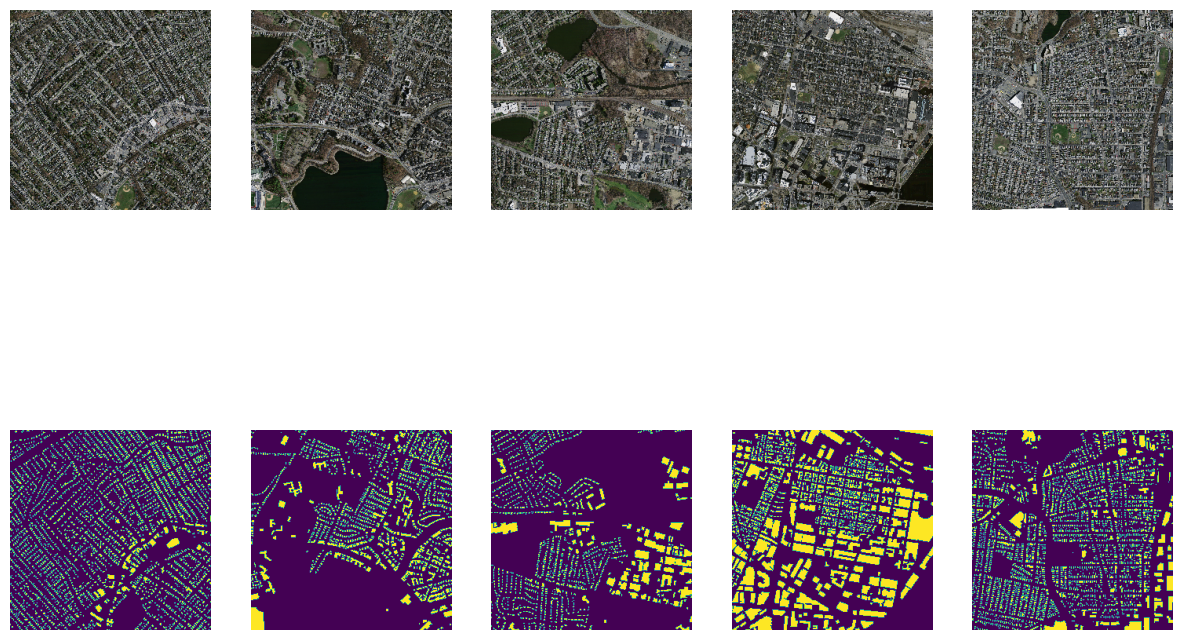

In [9]:
i=0
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.subplot(2,5,i+6)
    plt.imshow(test_masks[i])
    plt.axis('off')
plt.show()

In [11]:
for i , mask in enumerate(test_masks):
    print(f"Mask {i+1} : {np.unique(mask)}")

Mask 1 : [0. 1.]
Mask 2 : [0. 1.]
Mask 3 : [0. 1.]
Mask 4 : [0. 1.]
Mask 5 : [0. 1.]
Mask 6 : [0. 1.]
Mask 7 : [0. 1.]
Mask 8 : [0. 1.]
Mask 9 : [0. 1.]
Mask 10 : [0. 1.]


In [12]:
with open('test_images.pkl', 'wb') as file:
    pickle.dump(test_images,file)

In [13]:
with open('test_masks.pkl', 'wb') as file:
    pickle.dump(test_masks,file)